<a href="https://colab.research.google.com/github/foofoofoo97/intelligence_kuih_muih_recognition_system/blob/main/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting google drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image 
from numpy import asarray 
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# get the directory of collected images for each kuih type (kelapa)
train_directory = '/content/drive/MyDrive/422_Asgn/train'
test_directory = '/content/drive/MyDrive/422_Asgn/test'

# set batch size and image size
batch_size = 32
image_size = (180, 180)

In [ ]:
# import images dataset for training
train_images = image_dataset_from_directory(train_directory,
                                             shuffle=True,   
                                             batch_size=batch_size,                     
                                             image_size=image_size,)

Found 198 files belonging to 4 classes.


In [ ]:
# import images dataset for testing
test_images = image_dataset_from_directory(test_directory,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           image_size=image_size,)

Found 48 files belonging to 4 classes.


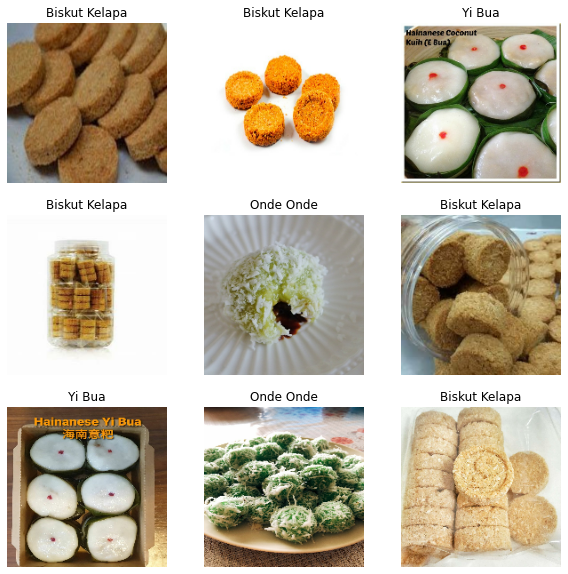

In [ ]:
# get class names for training image dataset
class_names = train_images.class_names

# label train images with its class names - types of kuih kelapa
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# training and testing image dataset
train_set = train_images.prefetch(buffer_size=32)
test_set = test_images.prefetch(buffer_size=32)

In [ ]:
# designing the model with 5 layers
# output layer with 4 classes indicating 4 types of kuih kelapa
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(180,180,3)),
  keras.layers.Dense(256, activation=tf.nn.relu),
  keras.layers.Dense(256, activation=tf.nn.relu),
  keras.layers.Dense(256, activation=tf.nn.relu),
  keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
# summary of the designed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 97200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               24883456  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 25,016,068
Trainable params: 25,016,068
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model with 50 epochs of training data and validate with testing data
epochs = 50
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1 = model.fit(train_set, validation_data=(test_set), epochs=epochs)

Epoch 1/50
7/7 [==============================] - 32s 5s/step - loss: 8447.5601 - accuracy: 0.3002 - val_loss: 13985.2646 - val_accuracy: 0.2500
Epoch 2/50
7/7 [==============================] - 2s 81ms/step - loss: 8661.0953 - accuracy: 0.2598 - val_loss: 6066.6016 - val_accuracy: 0.2500
Epoch 3/50
7/7 [==============================] - 2s 77ms/step - loss: 6541.9257 - accuracy: 0.3445 - val_loss: 2230.2507 - val_accuracy: 0.3958
Epoch 4/50
7/7 [==============================] - 2s 77ms/step - loss: 2641.9461 - accuracy: 0.4116 - val_loss: 1181.6193 - val_accuracy: 0.3333
Epoch 5/50
7/7 [==============================] - 2s 80ms/step - loss: 1827.8599 - accuracy: 0.4610 - val_loss: 573.8342 - val_accuracy: 0.4167
Epoch 6/50
7/7 [==============================] - 2s 77ms/step - loss: 757.2572 - accuracy: 0.5629 - val_loss: 1692.7965 - val_accuracy: 0.3125
Epoch 7/50
7/7 [==============================] - 2s 79ms/step - loss: 1126.1126 - accuracy: 0.4157 - val_loss: 2700.0701 - val_accu

In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/yibua.jpeg", target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Onde Onde


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/biskutkelapa.jpeg", target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Onde Onde


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/kuihketayap.jpeg", target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Onde Onde


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/ondeonde.jpeg", target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Onde Onde


In [ ]:
# evaluates the model using training image dataset
score = model.evaluate(train_set, verbose=1)

# output the model's performance based on the training image dataset
print('Train loss:', score[0])
print('Train accuracy:', score[1])

7/7 [==============================] - 1s 9ms/step - loss: 1100.7054 - accuracy: 0.3182
Train loss: 1100.7054443359375
Train accuracy: 0.3181818127632141


In [ ]:
# evaluates the model using testing image dataset
score = model.evaluate(test_set, verbose=1)

# output the model's performance based on the testing image dataset
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 10ms/step - loss: 1309.6304 - accuracy: 0.2917
Test loss: 1309.63037109375
Test accuracy: 0.2916666567325592


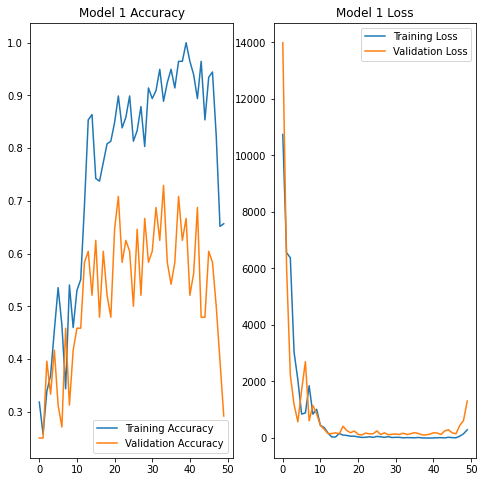

In [ ]:
# to visualize the results of training the model
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']

loss = model1.history['loss']
val_loss = model1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model 1 Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model 1 Loss')
plt.show()

In [ ]:
# save the trained model
model.save_weights("model1.h5")